<a href="https://colab.research.google.com/github/SilentStoneCA/papercode/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

!wget --no-check-certificate \
    'https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz' \
    -O /tmp/cifar-100-python.tar.gz

import os
import tarfile

local_tar = '/tmp/cifar-100-python.tar.gz'
tar_ref = tarfile.open(local_tar, "r:gz")
tar_ref.extractall('/tmp/cifar-100-python')
tar_ref.close()

In [2]:
mnist = tf.keras.datasets.cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
train_images.shape

(50000, 32, 32, 3)

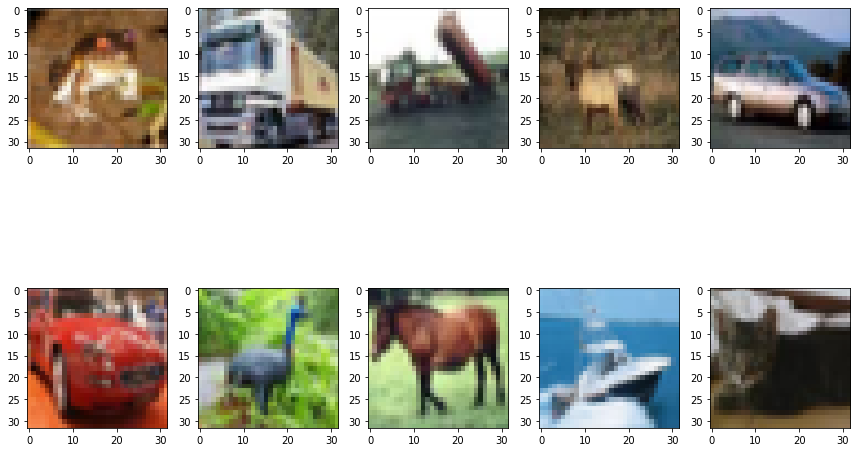

In [5]:
fig, axes = plt.subplots(2,5)
fig.set_size_inches(12,12);
for row in range(2) :
  for col in range(5):
    axes[row,col].imshow(train_images[row * 5 + col])
  plt.tight_layout();



In [6]:
#train_images = train_images.reshape(-1, 28, 28, 1)
#test_images = test_images.reshape(-1, 28, 28, 1)

In [7]:
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size = 0.2)

In [8]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((valid_images, valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [9]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
valid_ds_size = tf.data.experimental.cardinality(valid_ds).numpy()

In [10]:
def process_images(image, label):
  image = tf.image.per_image_standardization(image)
 # image = tf.image.resize(image, (224, 224))
  return image, label


train_ds = (train_ds.map(process_images)
                    .shuffle(buffer_size=train_ds_size)
                    .batch(batch_size=64, drop_remainder=True))

test_ds = (test_ds.map(process_images)
                    .shuffle(buffer_size=test_ds_size)
                    .batch(batch_size=64, drop_remainder=True))

valid_ds = (valid_ds.map(process_images)
                    .shuffle(buffer_size=valid_ds_size)
                    .batch(batch_size=64, drop_remainder=True))

In [12]:
model = tf.keras.models.Sequential([
     # tf.keras.layers.Lambda(lambda inputs: tf.image.resize(inputs, (224, 224,3))),
      tf.keras.layers.experimental.preprocessing.Resizing(224,224, input_shape=(32,32,3)),
      tf.keras.layers.Conv2D(96, (11, 11), activation='relu'),
      tf.keras.layers.MaxPool2D((3,3), strides=(2,2)),
      tf.keras.layers.Conv2D(256, (5,5), padding='same', activation='relu'),
      tf.keras.layers.MaxPool2D((3,3), strides=(2,2)),
      tf.keras.layers.Conv2D(384, (3,3), padding='same', activation='relu'),
      tf.keras.layers.Conv2D(384, (3,3), padding='same', activation='relu'),
      tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
      tf.keras.layers.MaxPool2D((3,3), strides=(2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units=4096, activation='relu'),
      tf.keras.layers.Dense(units=4096, activation='relu'),
      tf.keras.layers.Dense(units=100, activation='softmax')
])

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 214, 214, 96)      34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 106, 106, 96)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 256)     614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 52, 52, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 384)       1

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data= valid_ds, verbose=1)

Epoch 1/10
625/625 [==============================] - 590s 868ms/step - loss: 72.7716 - accuracy: 0.2078 - val_loss: 1.8136 - val_accuracy: 0.3333
Epoch 2/10
625/625 [==============================] - 549s 874ms/step - loss: 1.7527 - accuracy: 0.3548 - val_loss: 1.6720 - val_accuracy: 0.3935
Epoch 3/10
625/625 [==============================] - 548s 874ms/step - loss: 1.5603 - accuracy: 0.4292 - val_loss: 1.5642 - val_accuracy: 0.4385
Epoch 4/10
 46/625 [=>............................] - ETA: 7:53 - loss: 1.3150 - accuracy: 0.5214

In [ ]:
training_images_norm[0].shape

(28, 28)

In [ ]:
training_images_resized  = tf.image.resize(training_images_norm, [224, 224], method='nearest')
test_images_resized = tf.image.resize(training_images_norm, [224, 224], method='nearest')

In [ ]:
training_images_resized[0].shape

TensorShape([224, 28])

In [ ]:
training_images = training_images.reshape(-1, 224, 224,1) 
test_images = test_images.reshape(-1, 224, 224, 1)
training_labels = to_categorical(training_labels_orig)
test_labels = to_categorical(test_labels_orig)

AttributeError: ignored

In [ ]:
training_images, training_labels = shuffle(training_images, training_labels)
test_images, test_labels = shuffle(test_images, test_labels)

In [ ]:
BATCH_SIZE = 256
steps_per_epoch = int(training_images.shape[0] / BATCH_SIZE)

In [ ]:
train_gen = ImageDataGenerator(zoom_range=0.1,
                               rotation_range = 20,
                               height_shift_range = 0.1,
                               width_shift_range = 0.1)

In [ ]:
train_data = train_gen.flow(
                         training_images,
                         training_labels,
                         BATCH_SIZE)

In [ ]:
valid_data = valid_gen.flow(
                    test_images,
                    test_labels,
                    BATCH_SIZE)

In [ ]:
model = tf.keras.models.Sequential([
                                    
                                    
     
            
]) 

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_30 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_31 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_14 (Flatten)         (None, 120)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 84)              

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
history = model.fit(train_data, validation_data = valid_data, epochs=20,  verbose=1, steps_per_epoch = steps_per_epoch, callbacks=[learning_rate_reduction])

Epoch 1/20
234/234 [==============================] - 40s 172ms/step - loss: 0.0497 - accuracy: 0.9843 - val_loss: 0.0280 - val_accuracy: 0.9916
Epoch 2/20
234/234 [==============================] - 41s 174ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0248 - val_accuracy: 0.9919
Epoch 3/20
234/234 [==============================] - 41s 174ms/step - loss: 0.0506 - accuracy: 0.9842 - val_loss: 0.0255 - val_accuracy: 0.9917
Epoch 4/20
234/234 [==============================] - 41s 174ms/step - loss: 0.0483 - accuracy: 0.9847 - val_loss: 0.0243 - val_accuracy: 0.9920

Epoch 00004: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 5/20
234/234 [==============================] - 41s 174ms/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.0243 - val_accuracy: 0.9920
Epoch 6/20
234/234 [==============================] - 41s 174ms/step - loss: 0.0473 - accuracy: 0.9851 - val_loss: 0.0256 - val_accuracy: 0.9924
Epoch 7/20
234/234 [==============================

In [ ]:
model.evaluate(valid_data)

40/40 [==============================] - 2s 48ms/step - loss: 0.0242 - accuracy: 0.9921


[0.024173032492399216, 0.9921000003814697]

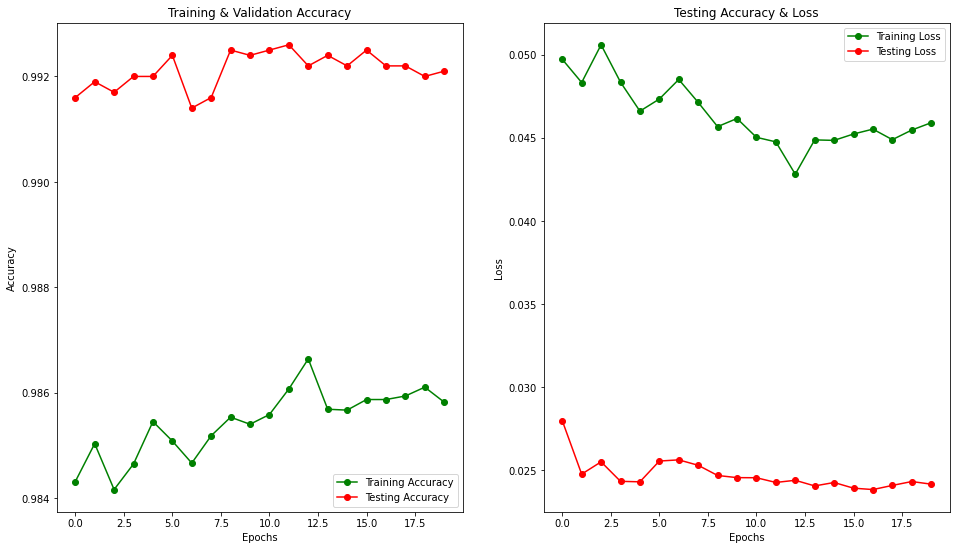

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
predictions = model.predict_classes(test_images / 255.)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd 
import seaborn as sns

In [ ]:
classes = ["Class " + str(i) for i in range(10) ]
print(classification_report(test_labels_orig, predictions, target_names = classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       980
     Class 1       0.99      1.00      1.00      1135
     Class 2       0.99      1.00      0.99      1032
     Class 3       0.99      1.00      0.99      1010
     Class 4       0.99      0.99      0.99       982
     Class 5       0.99      0.99      0.99       892
     Class 6       0.99      0.99      0.99       958
     Class 7       0.99      0.99      0.99      1028
     Class 8       1.00      0.98      0.99       974
     Class 9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
cm = confusion_matrix(test_labels_orig,predictions)

In [ ]:
cm = pd.DataFrame(cm , index = [i for i in range(10)] , columns = [i for i in range(10)])

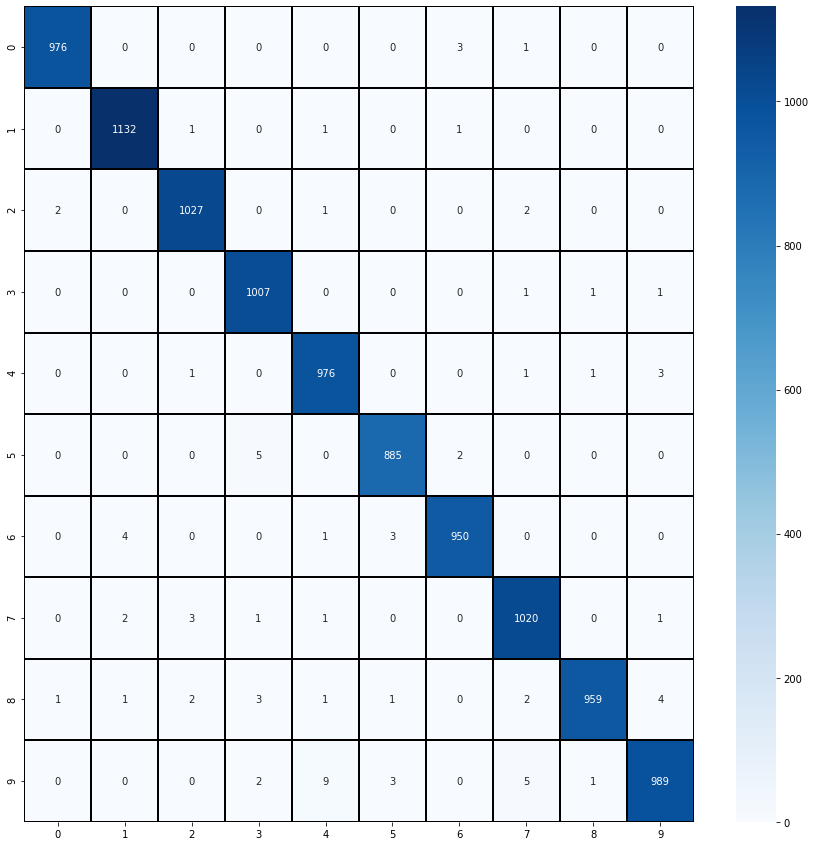

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')